# Data Preprocessing for Student Performance Analysis
This notebook handles loading the dataset, cleaning data, handling missing values, and feature engineering.


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (4).csv


/tmp/ipython-input-356956740.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


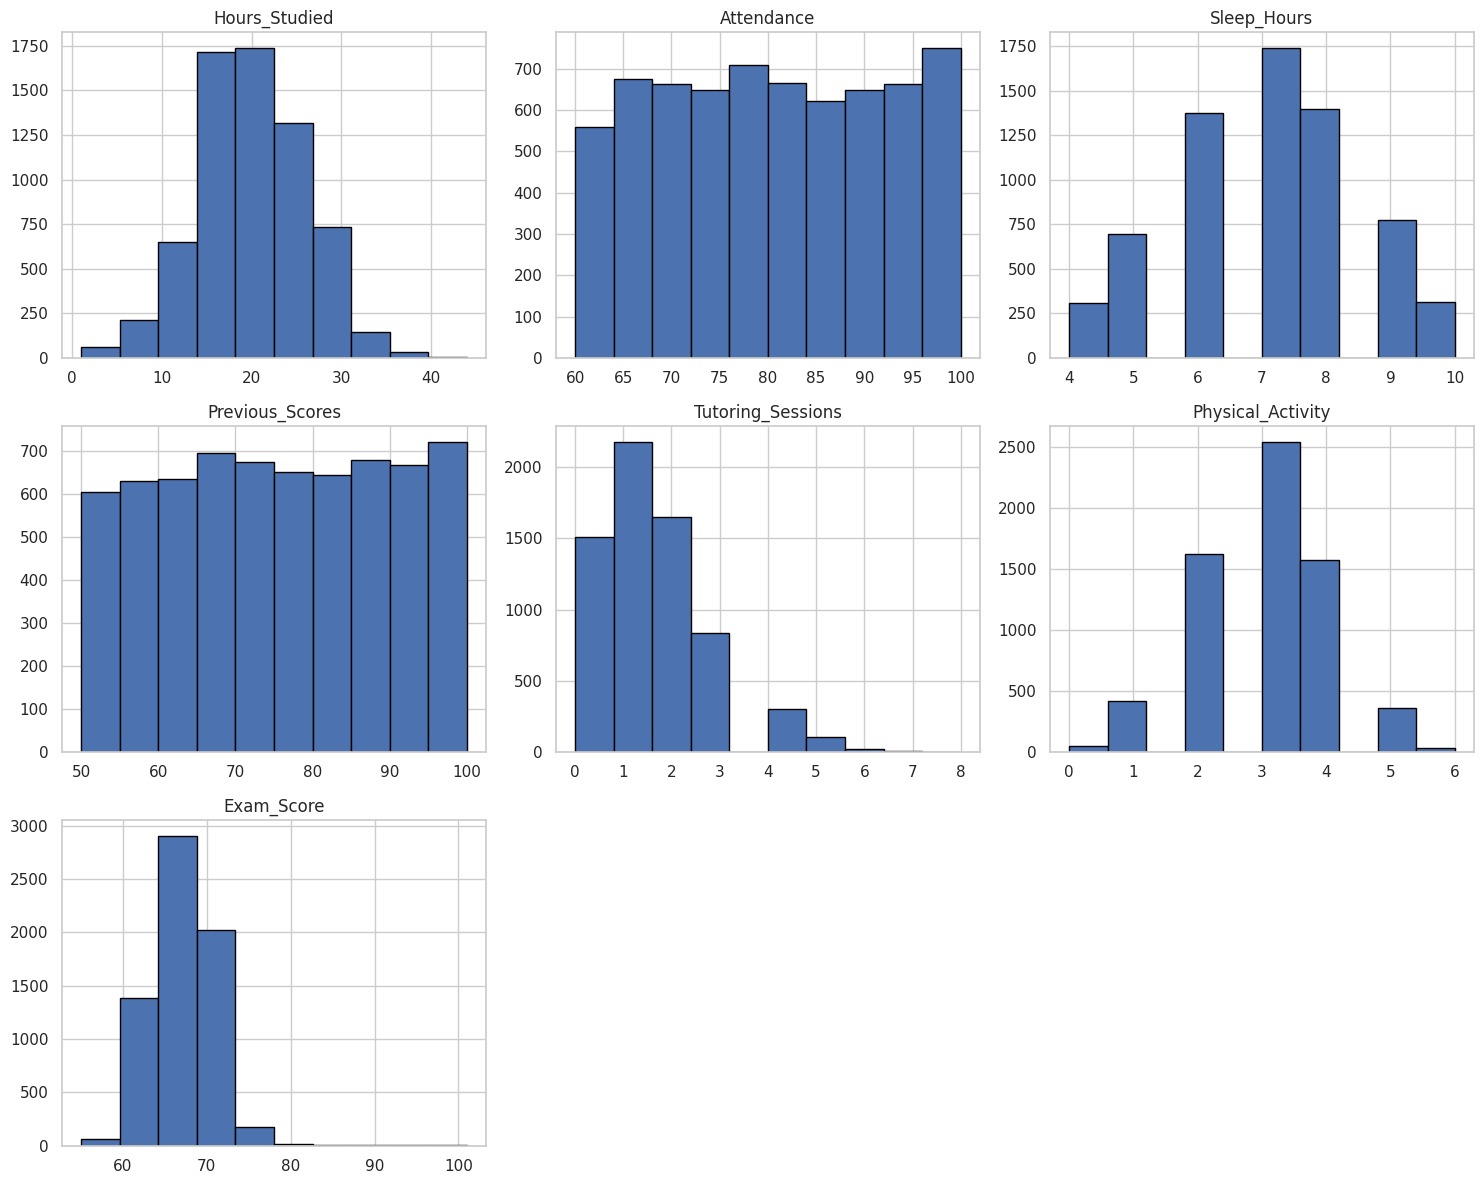

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# ----------------------------
# 1. IMPORT LIBRARIES
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")

# ----------------------------
# 2. LOAD DATA
# ----------------------------
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# ----------------------------
# 3. CLEAN DATA
# ----------------------------
df.replace(["", " "], np.nan, inplace=True)

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# ----------------------------
# 4. CREATE GRADE CATEGORY
# ----------------------------
if 'GradeCategory' not in df.columns:
    def score_to_grade(score):
        if score >= 90: return 'A+'
        elif score >= 80: return 'A'
        elif score >= 70: return 'B'
        elif score >= 60: return 'C'
        else: return 'D'
    df['GradeCategory'] = df['Exam_Score'].apply(score_to_grade)

# ----------------------------
# 5. VISUALIZATION
# ----------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15,12), edgecolor='black')
plt.tight_layout()
plt.show()

# Categorical visualization skipped (too many strings)

# ----------------------------
# 6. SAVE CLEANED CSV
# ----------------------------
df.to_csv("StudentPerformanceFactors_Cleaned.csv", index=False)
files.download("StudentPerformanceFactors_Cleaned.csv")
